In [1]:
import keras
keras.__version__

/home/sara/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.6'

In [1]:
import os
import pandas as pd

import numpy as np
from glob import glob
import cv2

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt



%matplotlib inline

/home/sara/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
base_dir = "data/chest_xray"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

In [ ]:
# images_per_class = {}
# for class_folder_name in os.listdir(train_dir):
#     class_folder_path = os.path.join(train_dir, class_folder_name)
#     class_label = class_folder_name
#     images_per_class[class_label] = []
#     for image_path in glob(os.path.join(class_folder_path, "*.jpeg")):
#         image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
#         images_per_class[class_label].append(image_bgr)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [11]:
checkpointer = ModelCheckpoint(filepath='saved_models/cats_and_dogs_small_1.h5', 
                               verbose=1, save_best_only=True)

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=400,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/30
400/400 [==============================] - 510s 1s/step - loss: 0.2178 - acc: 0.9131 - val_loss: 0.2680 - val_acc: 0.9375
Epoch 2/30
400/400 [==============================] - 512s 1s/step - loss: 0.0825 - acc: 0.9688 - val_loss: 0.4673 - val_acc: 0.8125
Epoch 3/30
400/400 [==============================] - 496s 1s/step - loss: 0.0574 - acc: 0.9788 - val_loss: 0.3462 - val_acc: 0.8125
Epoch 4/30
400/400 [==============================] - 484s 1s/step - loss: 0.0395 - acc: 0.9857 - val_loss: 0.9248 - val_acc: 0.7500
Epoch 5/30
400/400 [==============================] - 482s 1s/step - loss: 0.0289 - acc: 0.9891 - val_loss: 0.3336 - val_acc: 0.8750
Epoch 6/30
400/400 [==============================] - 484s 1s/step - loss: 0.0174 - acc: 0.9943 - val_loss: 0.2678 - val_acc: 0.8750
Epoch 7/30
400/400 [==============================] - 484s 1s/step - loss: 0.0120 - acc: 0.9960 - val_loss: 0.2758 - val_acc: 0.8750
Epoch 8/30
400/400 [==============================] - 476s 1s/step - 

In [1]:
score = model.evaluate_generator(validation_generator, steps=50)

print ('Test Score: ', score[0])
print ('Test Accuracy: ',score[1])

NameError: name 'model' is not defined

In [13]:
model.save('chest_xray_basicModel.h5')
model.save_weights('chest_xray_basicWeights.h5')

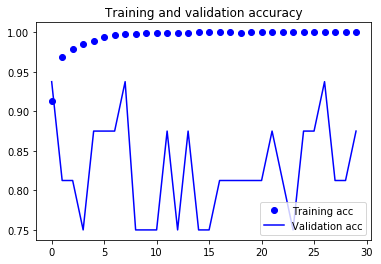

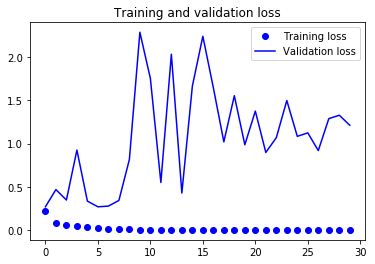

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()